# 0.0 IMPORTS

In [1]:
import math
import datetime
import numpy as np
import pandas as pd
import inflection
import seaborn as sns
import  matplotlib 
import  matplotlib.pyplot as plt

from scipy                          import stats as ss
from tabulate                       import tabulate
from IPython.display                import Image
from IPython.core.display           import HTML
from  matplotlib.gridspec           import GridSpec

# 0.1 Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

In [ ]:
jupyter_settings()

In [3]:
# Notação Científica
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)

## LOADING DATA

In [4]:
data = pd.read_csv('C:/Users/Utilizador/repos/Python_zero_ao_ds/Projeto_enem/DADOS/MICRODADOS_ENEM_2020.csv', sep=";", encoding='ISO-8859-1', low_memory=False)

In [5]:
data.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,200006271946,2020,11,F,1,2,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200001195856,2020,11,M,2,3,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200001943954,2020,4,F,2,3,2,2,0,2,...,B,A,A,B,A,A,A,A,A,A
3,200001908998,2020,2,M,1,3,1,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200001634757,2020,4,F,1,3,2,1,1,1,...,A,A,A,B,A,B,B,A,A,B


# 1.0 DATA CLEANING

## Data Description

In [6]:
df1 = data.copy()

## 1.1 Select Columns

In [7]:
df1.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [8]:
df1_columns_select = [
    'NU_INSCRICAO', 
    'NU_ANO', 
    'TP_FAIXA_ETARIA', 
    'TP_SEXO',
    'TP_ESTADO_CIVIL', 
    'TP_COR_RACA', 
    'TP_NACIONALIDADE',
    'TP_ST_CONCLUSAO', 
    'TP_ANO_CONCLUIU', 
    'TP_ESCOLA', 
    'TP_ENSINO',
    'NO_MUNICIPIO_ESC',
    'SG_UF_ESC', 
    'TP_DEPENDENCIA_ADM_ESC',
    'TP_LOCALIZACAO_ESC',  
    'NO_MUNICIPIO_PROVA', 
    'SG_UF_PROVA',
    'TP_PRESENCA_CN',
    'TP_PRESENCA_CH', 
    'TP_PRESENCA_LC',
    'TP_PRESENCA_MT',  
    'NU_NOTA_CN', 
    'NU_NOTA_CH', 
    'NU_NOTA_LC',
    'NU_NOTA_MT', 
    'TP_LINGUA',
    'TP_STATUS_REDACAO', 
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2', 
    'NU_NOTA_COMP3', 
    'NU_NOTA_COMP4', 
    'NU_NOTA_COMP5',
    'NU_NOTA_REDACAO',
    'Q001', 
    'Q002',
    'Q003',
    'Q004',
    'Q006',
    'Q024',
    'Q025']

In [9]:
df1 = df1.filter(items=df1_columns_select)

## 1.2 Rename Columns

In [10]:
cols_old = [
    'NU_INSCRICAO', 
    'NU_ANO', 
    'TP_FAIXA_ETARIA', 
    'TP_SEXO',
    'TP_ESTADO_CIVIL', 
    'TP_COR_RACA', 
    'TP_NACIONALIDADE',
    'TP_ST_CONCLUSAO', 
    'TP_ANO_CONCLUIU', 
    'TP_ESCOLA', 
    'TP_ENSINO',
    'NO_MUNICIPIO_ESC',
    'SG_UF_ESC', 
    'TP_DEPENDENCIA_ADM_ESC',
    'TP_LOCALIZACAO_ESC',  
    'NO_MUNICIPIO_PROVA', 
    'SG_UF_PROVA',
    'TP_PRESENCA_CN',
    'TP_PRESENCA_CH', 
    'TP_PRESENCA_LC',
    'TP_PRESENCA_MT',  
    'NU_NOTA_CN', 
    'NU_NOTA_CH', 
    'NU_NOTA_LC',
    'NU_NOTA_MT', 
    'TP_LINGUA',
    'TP_STATUS_REDACAO', 
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2', 
    'NU_NOTA_COMP3', 
    'NU_NOTA_COMP4', 
    'NU_NOTA_COMP5',
    'NU_NOTA_REDACAO',
    'Q001', 
    'Q002',
    'Q003',
    'Q004',
    'Q006',
    'Q024',
    'Q025']

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase, cols_old))

# Rename
df1.columns = cols_new
df1.columns

Index(['nu_inscricao', 'nu_ano', 'tp_faixa_etaria', 'tp_sexo',
       'tp_estado_civil', 'tp_cor_raca', 'tp_nacionalidade', 'tp_st_conclusao',
       'tp_ano_concluiu', 'tp_escola', 'tp_ensino', 'no_municipio_esc',
       'sg_uf_esc', 'tp_dependencia_adm_esc', 'tp_localizacao_esc',
       'no_municipio_prova', 'sg_uf_prova', 'tp_presenca_cn', 'tp_presenca_ch',
       'tp_presenca_lc', 'tp_presenca_mt', 'nu_nota_cn', 'nu_nota_ch',
       'nu_nota_lc', 'nu_nota_mt', 'tp_lingua', 'tp_status_redacao',
       'nu_nota_comp1', 'nu_nota_comp2', 'nu_nota_comp3', 'nu_nota_comp4',
       'nu_nota_comp5', 'nu_nota_redacao', 'q001', 'q002', 'q003', 'q004',
       'q006', 'q024', 'q025'],
      dtype='object')

## 1.3 Data Dimensions

In [11]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Cols: {}'.format(df1.shape[1]))

Number of Rows: 5783109
Number of Cols: 40


## 1.4 Data Types

In [12]:
df1.dtypes

nu_inscricao                int64
nu_ano                      int64
tp_faixa_etaria             int64
tp_sexo                    object
tp_estado_civil             int64
tp_cor_raca                 int64
tp_nacionalidade            int64
tp_st_conclusao             int64
tp_ano_concluiu             int64
tp_escola                   int64
tp_ensino                 float64
no_municipio_esc           object
sg_uf_esc                  object
tp_dependencia_adm_esc    float64
tp_localizacao_esc        float64
no_municipio_prova         object
sg_uf_prova                object
tp_presenca_cn              int64
tp_presenca_ch              int64
tp_presenca_lc              int64
tp_presenca_mt              int64
nu_nota_cn                float64
nu_nota_ch                float64
nu_nota_lc                float64
nu_nota_mt                float64
tp_lingua                   int64
tp_status_redacao         float64
nu_nota_comp1             float64
nu_nota_comp2             float64
nu_nota_comp3 

## 1.5 Check NA

In [13]:
df1.isna().sum()

nu_inscricao                    0
nu_ano                          0
tp_faixa_etaria                 0
tp_sexo                         0
tp_estado_civil                 0
tp_cor_raca                     0
tp_nacionalidade                0
tp_st_conclusao                 0
tp_ano_concluiu                 0
tp_escola                       0
tp_ensino                 4479663
no_municipio_esc          4878540
sg_uf_esc                 4878540
tp_dependencia_adm_esc    4878540
tp_localizacao_esc        4878540
no_municipio_prova              0
sg_uf_prova                     0
tp_presenca_cn                  0
tp_presenca_ch                  0
tp_presenca_lc                  0
tp_presenca_mt                  0
nu_nota_cn                3185669
nu_nota_ch                3028969
nu_nota_lc                3028969
nu_nota_mt                3185669
tp_lingua                       0
tp_status_redacao         3028969
nu_nota_comp1             3028969
nu_nota_comp2             3028969
nu_nota_comp3 

In [14]:
# percentage of missing data by total rows
df1.isna().sum() / df1.shape[0]

nu_inscricao             0.00
nu_ano                   0.00
tp_faixa_etaria          0.00
tp_sexo                  0.00
tp_estado_civil          0.00
tp_cor_raca              0.00
tp_nacionalidade         0.00
tp_st_conclusao          0.00
tp_ano_concluiu          0.00
tp_escola                0.00
tp_ensino                0.77
no_municipio_esc         0.84
sg_uf_esc                0.84
tp_dependencia_adm_esc   0.84
tp_localizacao_esc       0.84
no_municipio_prova       0.00
sg_uf_prova              0.00
tp_presenca_cn           0.00
tp_presenca_ch           0.00
tp_presenca_lc           0.00
tp_presenca_mt           0.00
nu_nota_cn               0.55
nu_nota_ch               0.52
nu_nota_lc               0.52
nu_nota_mt               0.55
tp_lingua                0.00
tp_status_redacao        0.52
nu_nota_comp1            0.52
nu_nota_comp2            0.52
nu_nota_comp3            0.52
nu_nota_comp4            0.52
nu_nota_comp5            0.52
nu_nota_redacao          0.52
q001      

## 1.6 Fillout NA ()

In [15]:
a = df1['nu_nota_cn'].mean()
df1['nu_nota_cn'] = df1['nu_nota_cn'].apply(lambda x: a if math.isnan(x) else x)

In [16]:
b = df1['nu_nota_ch'].mean()
df1['nu_nota_ch'] = df1['nu_nota_ch'].apply(lambda x: b if math.isnan(x) else x)

In [17]:
c = df1['nu_nota_lc'].mean()
df1['nu_nota_lc'] = df1['nu_nota_lc'].apply(lambda x: c if math.isnan(x) else x)

In [18]:
d = df1['nu_nota_mt'].mean()
df1['nu_nota_mt'] = df1['nu_nota_mt'].apply(lambda x: d if math.isnan(x) else x)

In [19]:
e = df1['nu_nota_comp1'].mean()
df1['nu_nota_comp1'] = df1['nu_nota_comp1'].apply(lambda x: e if math.isnan(x) else x)

In [20]:
f = df1['nu_nota_comp2'].mean()
df1['nu_nota_comp2'] = df1['nu_nota_comp2'].apply(lambda x: f if math.isnan(x) else x)

In [21]:
g = df1['nu_nota_comp3'].mean()
df1['nu_nota_comp3'] = df1['nu_nota_comp3'].apply(lambda x: g if math.isnan(x) else x)

In [22]:
h = df1['nu_nota_comp4'].mean()
df1['nu_nota_comp4'] = df1['nu_nota_comp4'].apply(lambda x: h if math.isnan(x) else x)

In [23]:
i = df1['nu_nota_comp5'].mean()
df1['nu_nota_comp5'] = df1['nu_nota_comp5'].apply(lambda x: i if math.isnan(x) else x)

In [24]:
j = df1['nu_nota_redacao'].mean()
df1['nu_nota_redacao'] = df1['nu_nota_redacao'].apply(lambda x: j if math.isnan(x) else x)

## 1.7 Change Types 

In [25]:
df1.dtypes

nu_inscricao                int64
nu_ano                      int64
tp_faixa_etaria             int64
tp_sexo                    object
tp_estado_civil             int64
tp_cor_raca                 int64
tp_nacionalidade            int64
tp_st_conclusao             int64
tp_ano_concluiu             int64
tp_escola                   int64
tp_ensino                 float64
no_municipio_esc           object
sg_uf_esc                  object
tp_dependencia_adm_esc    float64
tp_localizacao_esc        float64
no_municipio_prova         object
sg_uf_prova                object
tp_presenca_cn              int64
tp_presenca_ch              int64
tp_presenca_lc              int64
tp_presenca_mt              int64
nu_nota_cn                float64
nu_nota_ch                float64
nu_nota_lc                float64
nu_nota_mt                float64
tp_lingua                   int64
tp_status_redacao         float64
nu_nota_comp1             float64
nu_nota_comp2             float64
nu_nota_comp3 

## 1.8 Descriptive Statistical

In [26]:
num_attributes = df1.select_dtypes(include=['int64','float64' ])
num_attributes

,nu_inscricao,nu_ano,tp_faixa_etaria,tp_estado_civil,tp_cor_raca,tp_nacionalidade,tp_st_conclusao,tp_ano_concluiu,tp_escola,tp_ensino,...,nu_nota_lc,nu_nota_mt,tp_lingua,tp_status_redacao,nu_nota_comp1,nu_nota_comp2,nu_nota_comp3,nu_nota_comp4,nu_nota_comp5,nu_nota_redacao
0,200006271946,2020,11,1,2,1,1,11,1,NaN,...,523.80,520.58,1,NaN,119.73,121.89,110.34,123.49,97.96,573.41
1,200001195856,2020,11,2,3,1,1,11,1,NaN,...,595.30,711.30,1,1.00,120.00,120.00,120.00,120.00,100.00,580.00
2,200001943954,2020,4,2,3,2,2,0,2,1.00,...,523.80,520.58,0,NaN,119.73,121.89,110.34,123.49,97.96,573.41
3,200001908998,2020,2,1,3,1,2,0,2,1.00,...,624.20,759.40,0,1.00,140.00,200.00,140.00,120.00,160.00,760.00
4,200001634757,2020,4,1,3,2,1,1,1,NaN,...,523.80,520.58,1,NaN,119.73,121.89,110.34,123.49,97.96,573.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5783104,200003396891,2020,2,1,1,1,2,0,2,1.00,...,658.30,725.70,1,1.00,160.00,200.00,180.00,160.00,200.00,900.00
5783105,200006040822,2020,3,1,1,1,2,0,2,1.00,...,607.20,719.50,1,1.00,120.00,200.00,140.00,120.00,80.00,660.00
5783106,200004928656,2020,3,1,1,1,1,1,1,NaN,...,674.50,648.10,0,1.00,120.00,160.00,120.00,120.00,140.00,660.00
5783107,200006774808,2020,4,1,1,1,2,0,3,1.00,...,523.80,520.58,1,NaN,119.73,121.89,110.34,123.49,97.96,573.41


In [27]:
cat_attributes = df1.select_dtypes(exclude=['int64','float64'])
cat_attributes

,tp_sexo,no_municipio_esc,sg_uf_esc,no_municipio_prova,sg_uf_prova,q001,q002,q003,q004,q006,q024,q025
0,F,NaN,NaN,Belém,PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M,NaN,NaN,Natal,RN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F,Salvador,BA,Salvador,BA,B,C,A,D,B,A,A
3,M,Santana de Parnaíba,SP,Santana de Parnaíba,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F,NaN,NaN,Diamantina,MG,B,G,B,B,B,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...
5783104,F,Crateús,CE,Crateús,CE,E,G,A,D,G,B,B
5783105,M,Três Lagoas,MS,Três Lagoas,MS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5783106,F,NaN,NaN,Piraju,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5783107,F,Cuiabá,MT,Cuiabá,MT,G,G,E,E,N,D,B


## 1.8.1 Numerical Attributes

In [28]:
# Tendência central: média e mediana

# Média
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T

# Mediana
ct2= pd.DataFrame(num_attributes.apply(np.median)).T

In [29]:
# Dispersão: std, min, max, range, skew(assimetria), kurtosis(calda longa)

d1 = pd.DataFrame(num_attributes.apply(np.std)).T

d2 = pd.DataFrame(num_attributes.apply(np.min)).T

d3 = pd.DataFrame(num_attributes.apply(np.max)).T

d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T

d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T

d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

In [30]:
# concat

m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,nu_inscricao,200001014230.00,200007078230.00,6064000.00,200003926954.77,200003926949.00,1681619.68,-0.00,-1.20
1,nu_ano,2020.00,2020.00,0.00,2020.00,2020.00,0.00,0.00,0.00
2,tp_faixa_etaria,1.00,20.00,19.00,6.40,5.00,4.17,0.57,-0.89
3,tp_estado_civil,0.00,4.00,4.00,1.10,1.00,0.48,1.79,6.89
4,tp_cor_raca,0.00,5.00,5.00,2.15,2.00,1.01,-0.13,-1.12
5,tp_nacionalidade,0.00,4.00,4.00,1.03,1.00,0.21,8.21,85.77
6,tp_st_conclusao,1.00,4.00,3.00,1.45,1.00,0.69,1.33,0.78
7,tp_ano_concluiu,0.00,14.00,14.00,3.32,1.00,4.54,1.32,0.42
8,tp_escola,1.00,3.00,2.00,1.28,1.00,0.52,1.72,2.07
9,tp_ensino,1.00,2.00,1.00,1.01,NaN,0.08,11.78,136.67


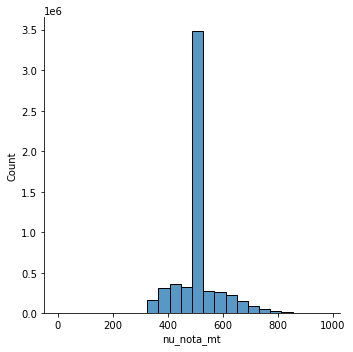

In [31]:
sns.displot(df1['nu_nota_mt']);

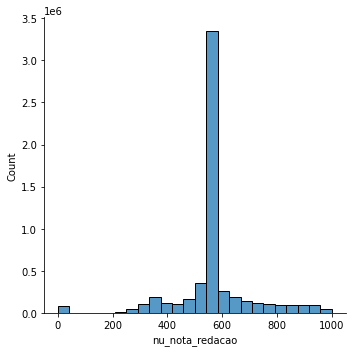

In [32]:
sns.displot(df1['nu_nota_redacao']);

## 1.8.2 Categorical Attributes

In [33]:
cat_attributes.apply(lambda x: x.unique().shape[0])

tp_sexo                  2
no_municipio_esc      5269
sg_uf_esc               28
no_municipio_prova    1712
sg_uf_prova             27
q001                     9
q002                     9
q003                     7
q004                     7
q006                    18
q024                     6
q025                     3
dtype: int64

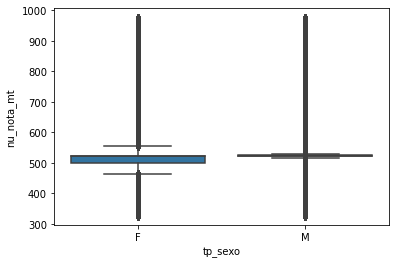

In [36]:
# Boxplot
aux1 = df1[(df1['nu_nota_mt'] > 0)]
sns.boxplot(x='tp_sexo', y='nu_nota_mt', data=aux1);

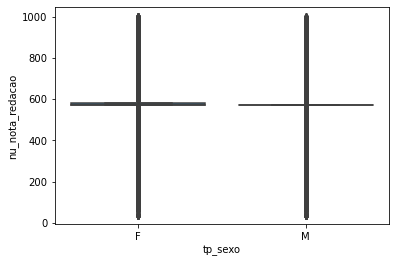

In [37]:
# Boxplot
aux1 = df1[(df1['nu_nota_redacao'] > 0)]
sns.boxplot(x='tp_sexo', y='nu_nota_redacao', data=aux1);